# Topic Modeling
This file apply topic modeling to different datasets. By labeling the corpus with topics, we can show the topic distribution in different groups, and use the catagorical topic features to predict specific targets (e.g. group affiliation, volume burst, etc)

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-pw9agi8y
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-pw9agi8y
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np

# import the data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
df = pd.read_csv('/content/drive/MyDrive/DBCommunity/saved_data/tech_aca_data.csv')
df.head()

,Title,Text,Author,Reply,LastReply,PublishTime,Like,Collect,Repost,Community_name,...,Reply_Month,Reply_Day,Pub_Year,Pub_Month,Pub_Day,normalized_text,tokenized_sentences,TopPost,Length,Aca
0,精华\n\n\n \n ...,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1115,2023-12-21,2020-10-09,2,4,4,Academia,...,12,21,2020,10,9,"['猴面包树', '组员', '倡议', '小组', '建立', '官方', 'slack'...","[['猴面包树', '组员', '倡议', '小组', '建立', '官方', 'slack...",True,313,1.0
1,精华\n\n\n \n ...,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,64,2023-12-01,2020-10-14,1,2,1,Academia,...,12,1,2020,10,14,"['本帖', '问卷调查', '招募', '研究', '对象', '贴', '姐妹', '问...","[['本帖', '问卷调查', '招募', '研究', '对象', '贴', '姐妹', '...",True,67,1.0
2,精华\n\n\n \n ...,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,12,2023-07-04,2020-10-10,4,6,4,Academia,...,7,4,2020,10,10,"['前', '情', '意见', '征集', '贴', 'https', 'www', 'd...","[['前', '情', '意见', '征集', '贴', 'https', 'www'], ...",True,244,1.0
3,精华\n\n\n \n ...,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2023-05-03,2020-11-02,1,6,0,Academia,...,5,3,2020,11,2,"['论坛', '第二期', '分享', '会', '说', 'PhD', '人生', '路径...","[['论坛', '第二期', '分享', '会', '说', 'phd', '人生', '路...",True,177,1.0
4,精华\n\n\n \n ...,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,6,2023-03-25,2020-12-09,2,2,1,Academia,...,3,25,2020,12,9,"['09', '30', '21', '更新', '管理员', '实在', '能力', '追...","[['更新', '管理员', '实在', '能力', '追踪', '申请', '相关', '...",True,478,1.0


In [50]:
# Based on several attempts of conducting topic modeling, we need to add some stop words of the normalized text
stop_words = ["1", "～", "【", "】", "https", "&", "a", "www", "1", "s", "‘", "’", "The", "|", "rt"]
def elim_stop(l, stopwords):
  new_l = []
  for word in l:
    if word not in stop_words:
      new_l.append(word)
  return new_l

In [51]:
df['normalized_text'] = df['normalized_text'].apply(lambda x: eval(x))
df['normalized_text'] = df['normalized_text'].apply(lambda x: elim_stop(x, stop_words))
df['normalized_text'][:3]

0    [猴面包树, 组员, 倡议, 小组, 建立, 官方, slack, 交流, 群, 营造, 更...
1    [本帖, 问卷调查, 招募, 研究, 对象, 贴, 姐妹, 问卷调查, 帮忙, 填写, 招募...
2    [前, 情, 意见, 征集, 贴, douban, group, topic, 195568...
Name: normalized_text, dtype: object

In [52]:
# create a copora
dictionary_df = gensim.corpora.Dictionary(df['normalized_text'])
# gensim.corpora.Dictionary is a class in Gensim that is used to map each unique word to a unique id.

In [53]:
corpus = [dictionary_df.doc2bow(text) for text in df['normalized_text']]
# This line converts the list of words in each document into a bag-of-words (BoW) format using the doc2bow method. doc2bow counts the number of occurrences of each unique word in the document and represents the document as a list of (word_id, word_count) tuples.
# The result is a corpus, which is a list of such BoW representations for all documents in the DataFrame.

In [54]:
# serialize the corpus as a file and load it
gensim.corpora.MmCorpus.serialize('df.mm', corpus)
df_mm = gensim.corpora.MmCorpus('df.mm')

In [55]:
# Apply the LDA model
dflda = gensim.models.ldamodel.LdaModel(corpus=df_mm, id2word=dictionary_df, num_topics=10, alpha='auto', eta='auto')
# This line creates an LDA model using the LdaModel class. The LDA (Latent Dirichlet Allocation) model is a type of topic model that discovers abstract "topics" that occur in a collection of documents.
# corpus=df_mm specifies the corpus to model.
# id2word=dictionary_df provides the mapping from word ids to words.
# num_topics=10 sets the number of topics to be extracted from the corpus.
# alpha='auto' and eta='auto' allow the model to automatically learn the hyperparameters for the document-topic (alpha) and topic-word (eta) distributions, respectively.
# The result is wialda, an LDA model trained on the corpus, capable of inferring topics from the collection of documents.

In [56]:
dfldaDF = pandas.DataFrame({
        'title' : df['Title'],
        'topics' : [dflda[dictionary_df.doc2bow(l)] for l in df['normalized_text']]
    })

In [57]:
#Dict to temporally hold the probabilities
wiatopicsProbDict = {i : [0] * len(dfldaDF) for i in range(dflda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(dfldaDF['topics']):
    for topicNum, prob in topicTuples:
        wiatopicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(dflda.num_topics):
    dfldaDF['topic_{}'.format(topicNum)] = wiatopicsProbDict[topicNum]

dfldaDF[1::300]

,title,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,精华\n\n\n \n ...,"[(3, 0.16768518), (5, 0.68521994), (8, 0.11947...",0.000000,0.000000,0.000000,0.167685,0.000000,0.685220,0.000000,0.000000,0.119471,0.000000
301,想去加拿大读博，提前一年进该组做科研助理是否可行？,"[(7, 0.1686922), (9, 0.8153666)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168692,0.000000,0.815367
601,性别主义研究,"[(2, 0.0136393765), (3, 0.44305834), (8, 0.115...",0.000000,0.000000,0.013639,0.443058,0.000000,0.000000,0.000000,0.000000,0.115431,0.402826
901,该怎么回复导师呢,"[(1, 0.21861526), (2, 0.22238939), (6, 0.10440...",0.000000,0.218615,0.222389,0.000000,0.000000,0.000000,0.104410,0.433454,0.000000,0.000000
1201,HKSYU 社会学系招聘研究助理：文化遗产/数字遗产/虚拟博物馆/...,"[(2, 0.31693384), (3, 0.19430257), (5, 0.19107...",0.000000,0.000000,0.316934,0.194303,0.000000,0.191070,0.000000,0.000000,0.000000,0.279875
1501,北欧排名300多大学的岗位制博士可以去吗？,"[(2, 0.38779128), (9, 0.5981129)]",0.000000,0.000000,0.387791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.598113
1801,phd申请要求看MA的论文 超级慌怎么破,"[(1, 0.1451757), (2, 0.13673314), (6, 0.269153...",0.000000,0.145176,0.136733,0.000000,0.000000,0.000000,0.269153,0.000000,0.203499,0.234818
2101,未来想run呜呜呜 硕士专业选择求助sos,"[(1, 0.7339632), (2, 0.01167744), (8, 0.084112...",0.000000,0.733963,0.011677,0.000000,0.000000,0.000000,0.000000,0.000000,0.084113,0.167720
2401,关于和教授coauthor,"[(8, 0.20216873), (9, 0.7804257)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202169,0.780426
2701,PhD入学前焦虑,"[(2, 0.37040654), (3, 0.06609129), (7, 0.03477...",0.000000,0.000000,0.370407,0.066091,0.000000,0.000000,0.000000,0.034777,0.000000,0.521745


In [58]:
# Visualization
dfldaDFV = dfldaDF[:10][['topic_%d' %x for x in range(10)]]
dfldaDFVisN = dfldaDF.index[:10]
dfldaDFVis = dfldaDFV.values
dfldaDFVisNames = dfldaDFVisN.values
dfldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.0,0.0,0.000000,0.000000,0.0,0.674394,0.074725,0.146408,0.000000,0.099353
1,0.0,0.0,0.000000,0.167685,0.0,0.685220,0.000000,0.000000,0.119471,0.000000
2,0.0,0.0,0.000000,0.094434,0.0,0.805421,0.000000,0.000000,0.000000,0.093672
3,0.0,0.0,0.000000,0.170290,0.0,0.733571,0.000000,0.000000,0.000000,0.085006
4,0.0,0.0,0.000000,0.000000,0.0,0.243464,0.000000,0.140908,0.000000,0.611502
5,0.0,0.0,0.000000,0.430642,0.0,0.000000,0.000000,0.000000,0.537377,0.000000
6,0.0,0.0,0.117137,0.042938,0.0,0.656085,0.000000,0.041031,0.080853,0.060579
7,0.0,0.0,0.069404,0.000000,0.0,0.409260,0.000000,0.185325,0.204609,0.128015
8,0.0,0.0,0.000000,0.056359,0.0,0.408397,0.012408,0.000000,0.408674,0.112673
9,0.0,0.0,0.000000,0.000000,0.0,0.376726,0.000000,0.048079,0.000000,0.561267


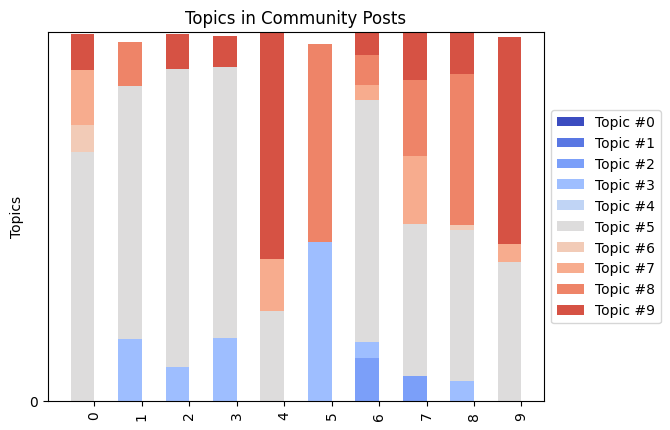

In [59]:
# stacked bar chart
N = 10
ind = np.arange(N)
K = dflda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, dfldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, dfldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += dfldaDFVis[:, k]
    plots.append(p)


plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Community Posts')
plt.xticks(ind+width/2, dfldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

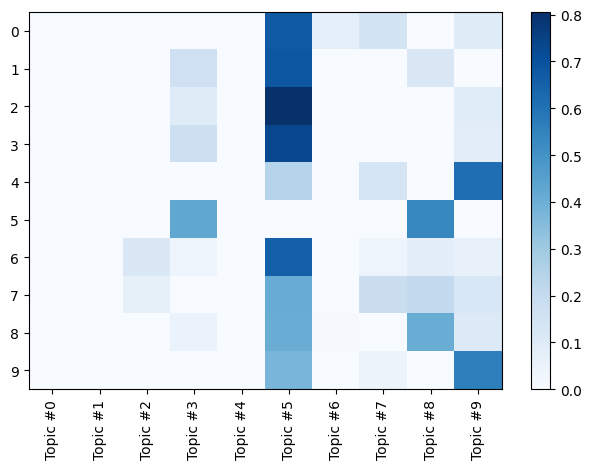

In [60]:
# heat map

plt.pcolor(dfldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(dfldaDFVis.shape[0])+0.5, dfldaDFVisNames);
plt.xticks(np.arange(dfldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [61]:
# top words
dflda.show_topic(3)

[('工作', 0.020066317),
 ('公司', 0.0151102645),
 ('产品', 0.0136709055),
 ('数据', 0.008646262),
 ('会', 0.0067151194),
 ('岗位', 0.0066421325),
 ('经验', 0.0063469475),
 ('2', 0.0062674214),
 ('姐妹', 0.0062283496),
 ('相关', 0.0061602294)]

In [62]:
topicsDict = {}
for topicNum in range(dflda.num_topics):
    topicWords = [w for w, p in dflda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,转码,工作,工作,工作,product,姐妹,内,说,女性,工作
1,MS,感觉,公司,公司,role,活动,申请,问,人,申请
2,找工,姐妹,会,产品,skills,分享,推,面试,会,姐妹
3,I,专业,面试,数据,乙方,女性,导师,会,工作,国内
4,课,去,项目,会,experience,*,姐妹,没,看,找
5,ds,公司,去,岗位,南京,会,荷兰,看,说,专业
6,stat,找,实习,经验,testing,推荐,说,感觉,好,学校
7,去,会,人,2,m,leetcode,工作,写,职场,实习
8,工作,好,好,姐妹,partner,小组,学校,人,更,去
9,会,说,学习,相关,customer,~,会,面试官,写,好


Telling from the top words in different topics, we can sum it up as 10 topic themes:
0. Transfer to CS
1. Work experience
2. Internship
3. Data-related project
4. Customer Experience
5. Female mutual help
6. Graduate studies
7. Interview
8. Feminism
9. Work in China



In [66]:
dfldaDF.shape

(17969, 12)

In [67]:
# save the topic distribution
dfldaDF.to_csv('/content/drive/MyDrive/DBCommunity/saved_data/topic_models_tech_aca.csv', index=False)